In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager as fm
from  matplotlib import cm
import json
import requests
from pandas.io.json import json_normalize
from geopy.distance import geodesic

In [2]:
crimeData = pd.read_csv("data/NYPD_Arrests_Data__Historic_.csv").dropna()
collisionData = pd.read_csv("data/Motor_Vehicle_Collisions_-_Crashes.csv")
airbnbData = pd.read_csv("data/AB_NYC_2019.csv").dropna()

/Applications/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
def plotPieChart(data,label,title):
    fig, axes = plt.subplots(figsize=(15,15),ncols=2)
    ax1, ax2 = axes.ravel()

    colors = cm.rainbow(np.arange(len(data))/len(data))# colormaps: Paired, autumn, rainbow, gray,spring,Darks
    patches, texts, autotexts = ax1.pie(data, labels=labels, autopct='%1.0f%%',
        shadow=False, startangle=170, colors=colors)

    ax1.axis('equal')  
    
    proptease = fm.FontProperties()
    proptease.set_size('xx-small')
    # font size include: ‘xx-small’,x-small’,'small’,'medium’,‘large’,‘x-large’,‘xx-large’ or number, e.g. '12'
    plt.setp(autotexts, fontproperties=proptease)
    plt.setp(texts, fontproperties=proptease)

    ax1.set_title(title, loc='center')
    ax2.axis('off')
    ax2.legend(patches, labels, loc='center left')

    plt.tight_layout()
    plt.savefig('Demo_project_set_legend_good.jpg')
    plt.show()

In [4]:
crimeData.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
3,189714430,11/07/2018,117.0,RECKLESS ENDANGERMENT 1,126.0,MISCELLANEOUS PENAL LAW,PL 1202500,F,M,26,0.0,45-64,M,WHITE,993685.0,233346.0,40.807160,-73.965920,POINT (-73.96591978699998 40.80715993100006)
5,190017529,11/15/2018,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,B,47,0.0,45-64,M,BLACK,1026486.0,262591.0,40.887333,-73.847250,POINT (-73.84725001299995 40.88733281800006)
10,189678705,11/07/2018,175.0,"SEXUAL ABUSE 3,2",233.0,SEX CRIMES,PL 13052A1,M,B,52,0.0,25-44,M,BLACK,1017542.0,255919.0,40.869059,-73.879630,POINT (-73.87963014799993 40.86905853200005)
14,189068425,10/22/2018,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,K,94,0.0,45-64,M,BLACK,995886.0,200705.0,40.717566,-73.958026,POINT (-73.95802570099994 40.71756616100004)
15,65864442,09/17/2009,164.0,SODOMY 3,116.0,SEX CRIMES,PL 1304002,F,S,122,0.0,25-44,M,BLACK HISPANIC,954943.0,148360.0,40.573850,-74.105496,POINT (-74.10549615599997 40.573849649000074)


Let's take a look a the distrubation of crime type and where they happend

In [5]:
typeCount = crimeData['OFNS_DESC']
typeCount = typeCount.value_counts(sort=True)
labels =typeCount.index
number = np.array(typeCount)

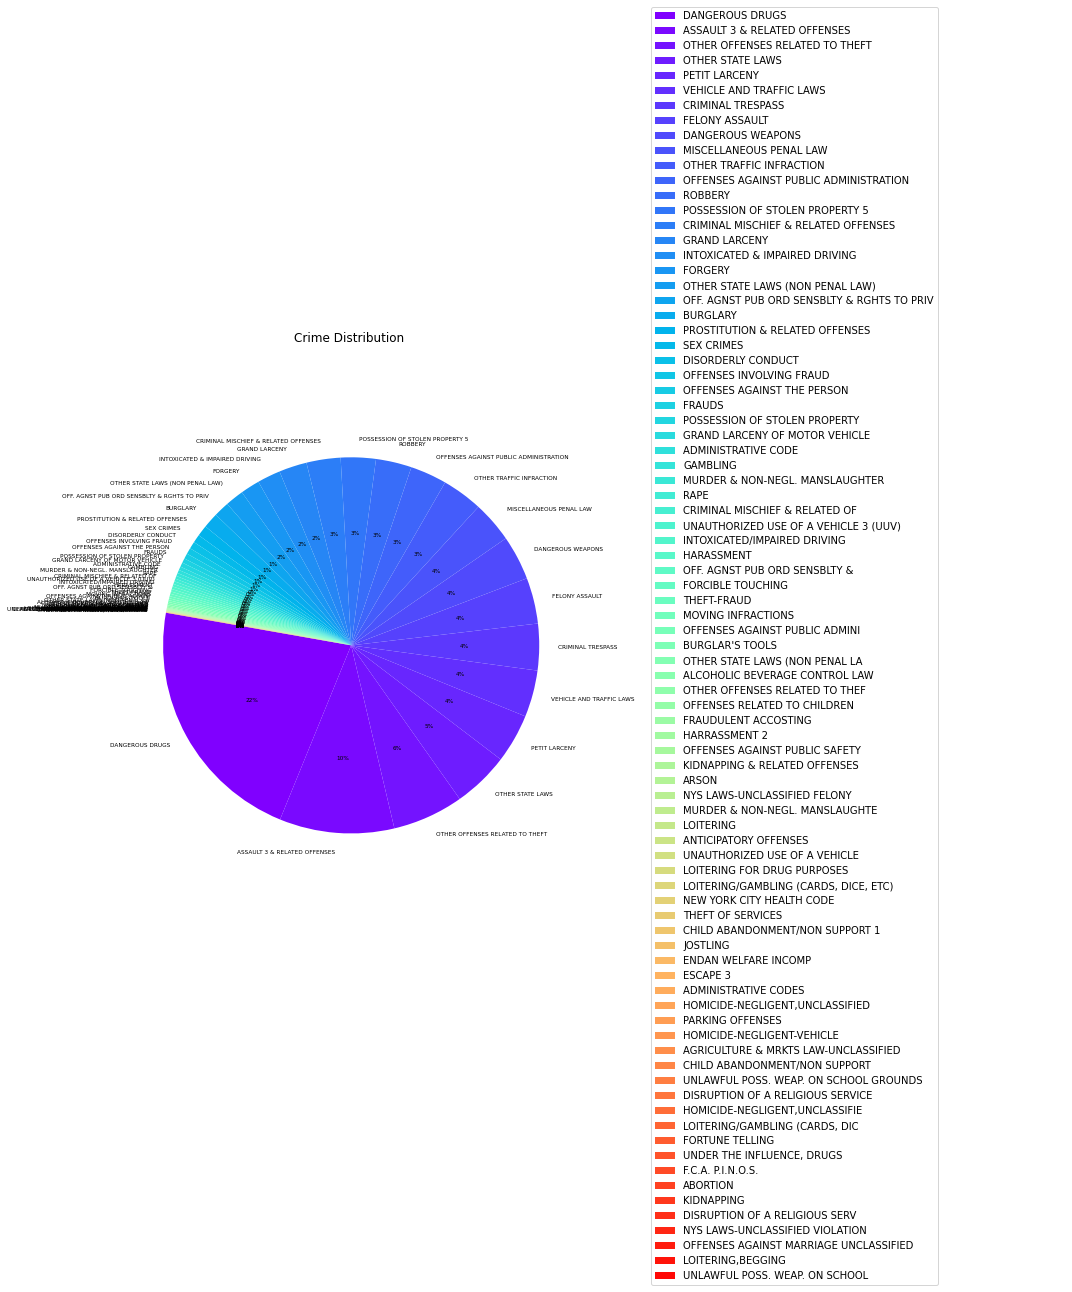

In [6]:
plotPieChart(number,labels, "Crime Distribution")

Then, let's take a look a how these arrests distribute amoung boroughs.

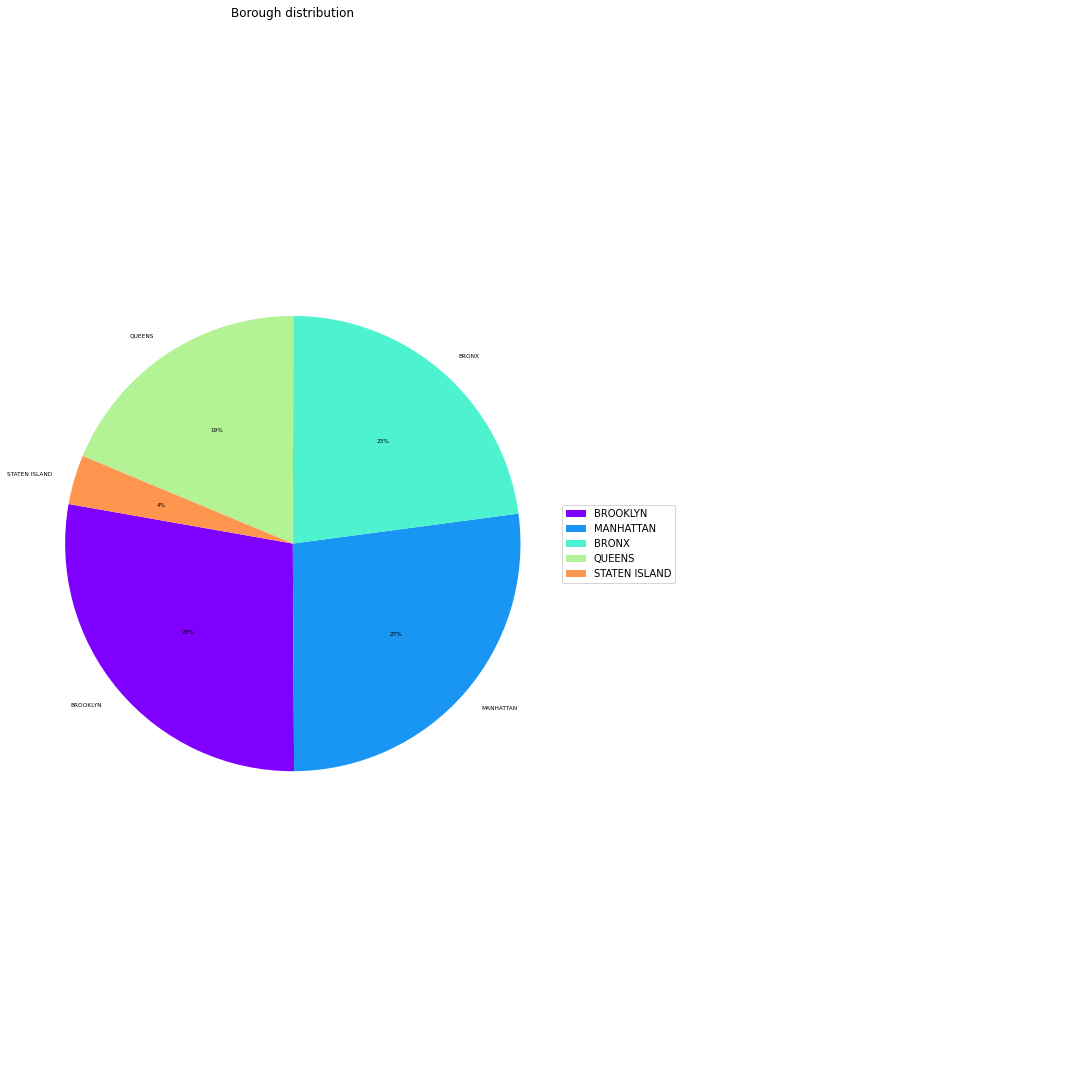

In [7]:
typeBorough = crimeData['ARREST_BORO']
typeBorough = typeBorough.replace(['K','Q','M','B','S'], ['BROOKLYN', 'QUEENS', 'MANHATTAN', 'BRONX', 'STATEN ISLAND'])
typeCountB = typeBorough.value_counts()
labels = typeCountB.index
numberB = np.array(typeCountB)
plotPieChart(typeCountB,labels,"Borough distribution")

Based on previous pie chart, we select severl crime that happens alot and might affect house rent and sale prices.
There Assault, theft, and trespassing. We check these types of crime separatly in different borough.

In [8]:
crimeGivenBorough = crimeData[['OFNS_DESC','ARREST_BORO']]

In [9]:
assult = crimeGivenBorough.loc[crimeGivenBorough['OFNS_DESC']=='ASSAULT 3 & RELATED OFFENSES']
theft = crimeGivenBorough.loc[crimeGivenBorough['OFNS_DESC']=='OTHER OFFENSES RELATED TO THEFT']
threspassing = crimeGivenBorough.loc[crimeGivenBorough['OFNS_DESC']=='CRIMINAL TRESPASS']

Lets plot them out

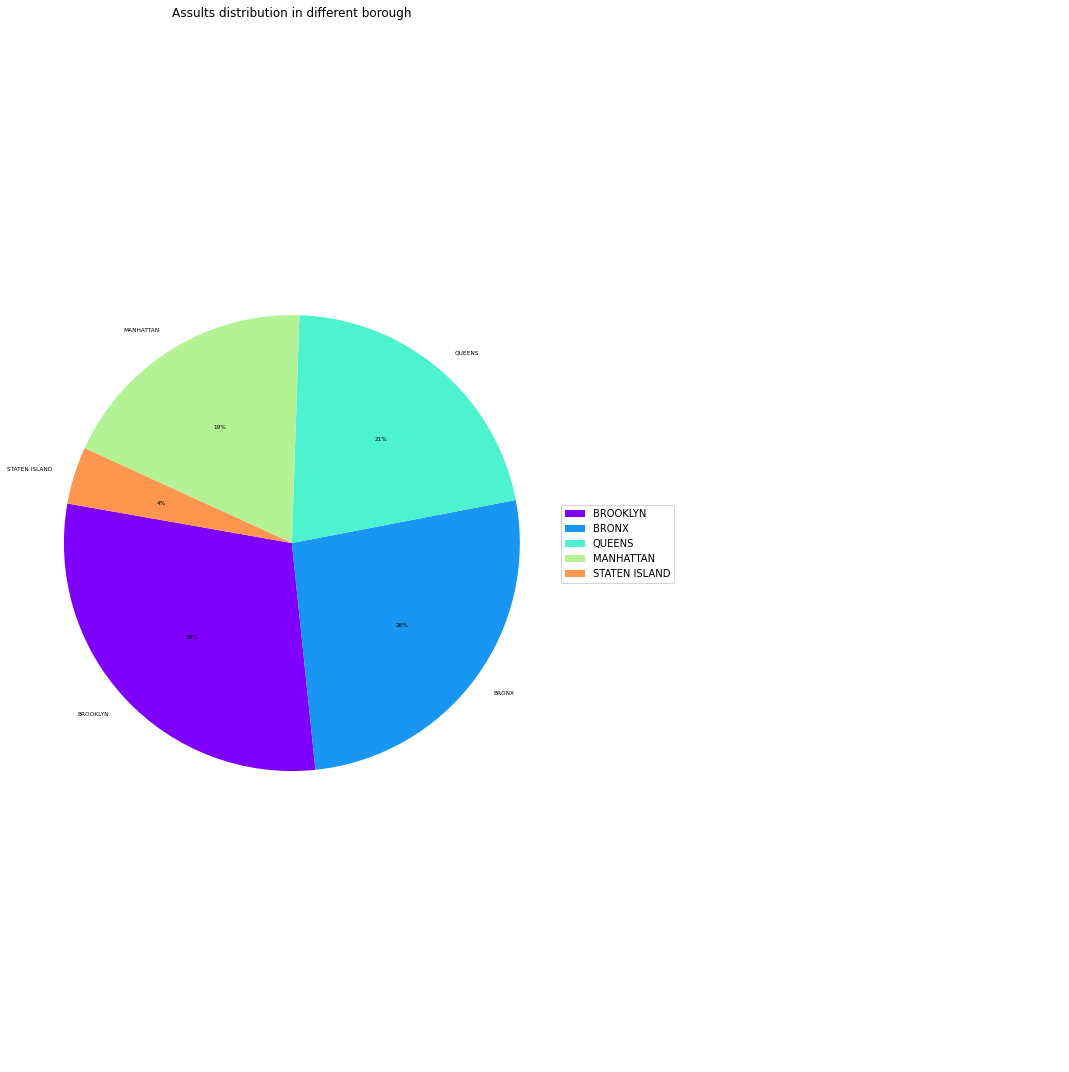

In [10]:
data = assult['ARREST_BORO']
data = data.replace(['K','Q','M','B','S'], ['BROOKLYN', 'QUEENS', 'MANHATTAN', 'BRONX', 'STATEN ISLAND'])
data = data.value_counts()
labels = data.index
plotPieChart(data,labels,"Assults distribution in different borough")

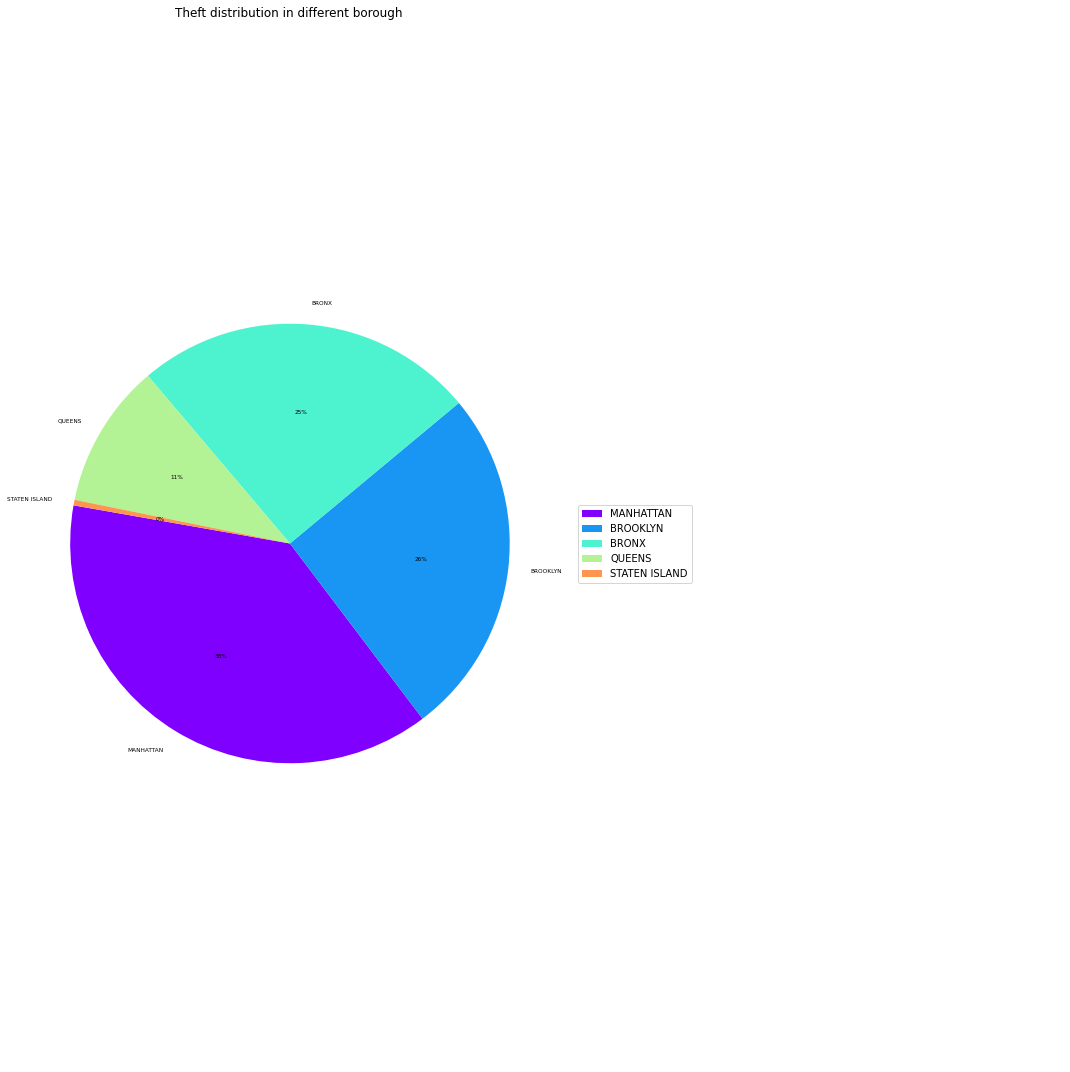

In [11]:
data = theft['ARREST_BORO']
data = data.replace(['K','Q','M','B','S'], ['BROOKLYN', 'QUEENS', 'MANHATTAN', 'BRONX', 'STATEN ISLAND'])
data = data.value_counts()
labels = data.index
plotPieChart(data,labels,"Theft distribution in different borough")

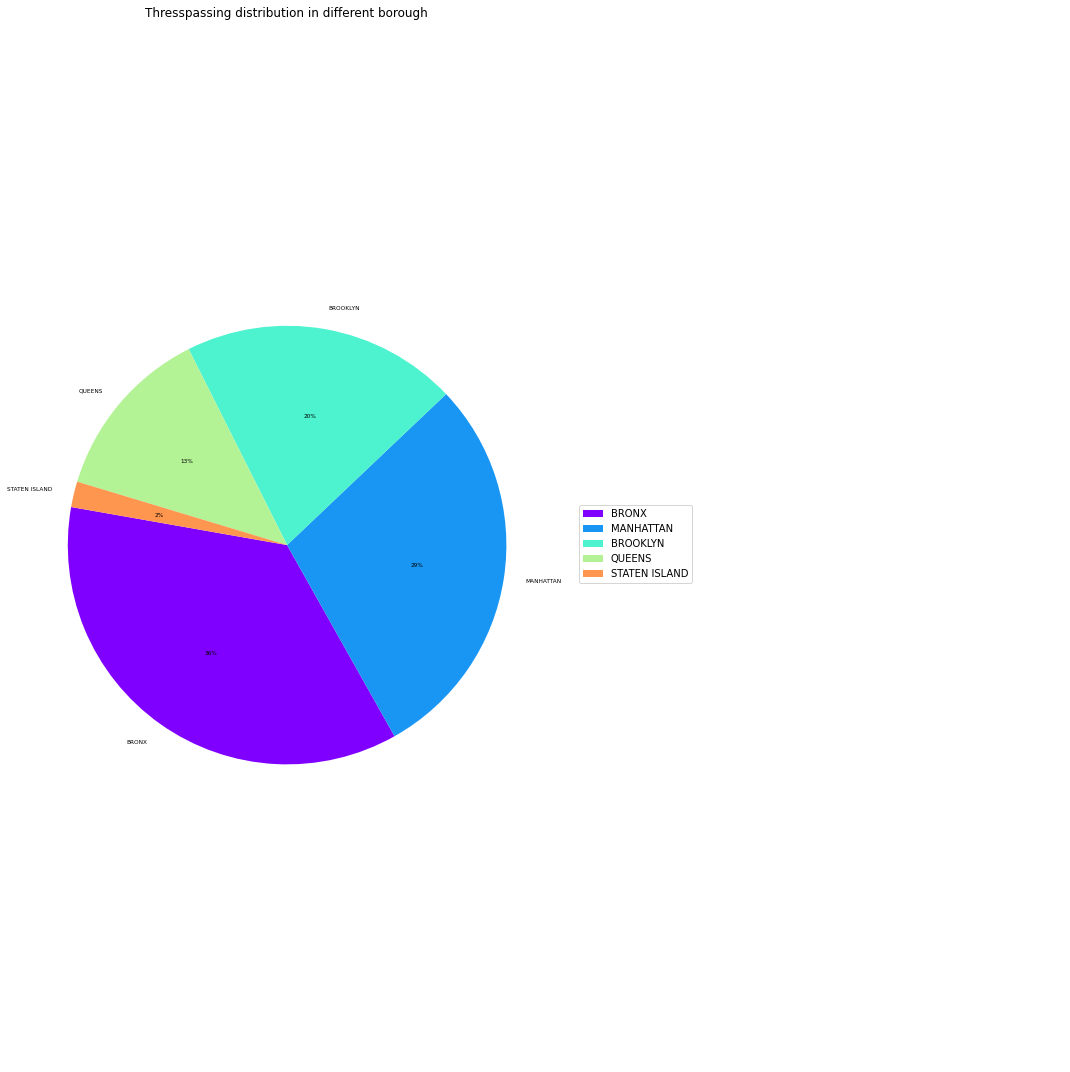

In [12]:
data = threspassing['ARREST_BORO']
data = data.replace(['K','Q','M','B','S'], ['BROOKLYN', 'QUEENS', 'MANHATTAN', 'BRONX', 'STATEN ISLAND'])
data = data.value_counts()
labels = data.index
plotPieChart(data,labels,"Thresspassing distribution in different borough")

Lets now have a view of collision data and how these collision distributed among boroughs

In [13]:
collisionData.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,04/14/2021,5:32,NaN,NaN,NaN,NaN,NaN,BRONX WHITESTONE BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4407480,Sedan,Sedan,NaN,NaN,NaN
1,04/13/2021,21:35,BROOKLYN,11217.0,40.68358,-73.97617,"(40.68358, -73.97617)",NaN,NaN,620 ATLANTIC AVENUE,...,NaN,NaN,NaN,NaN,4407147,Sedan,NaN,NaN,NaN,NaN
2,04/15/2021,16:15,NaN,NaN,NaN,NaN,NaN,HUTCHINSON RIVER PARKWAY,NaN,NaN,...,NaN,NaN,NaN,NaN,4407665,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,04/13/2021,16:00,BROOKLYN,11222.0,NaN,NaN,NaN,VANDERVORT AVENUE,ANTHONY STREET,NaN,...,Unspecified,NaN,NaN,NaN,4407811,Sedan,NaN,NaN,NaN,NaN
4,04/12/2021,8:25,NaN,NaN,0.00000,0.00000,"(0.0, 0.0)",EDSON AVENUE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4406885,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN


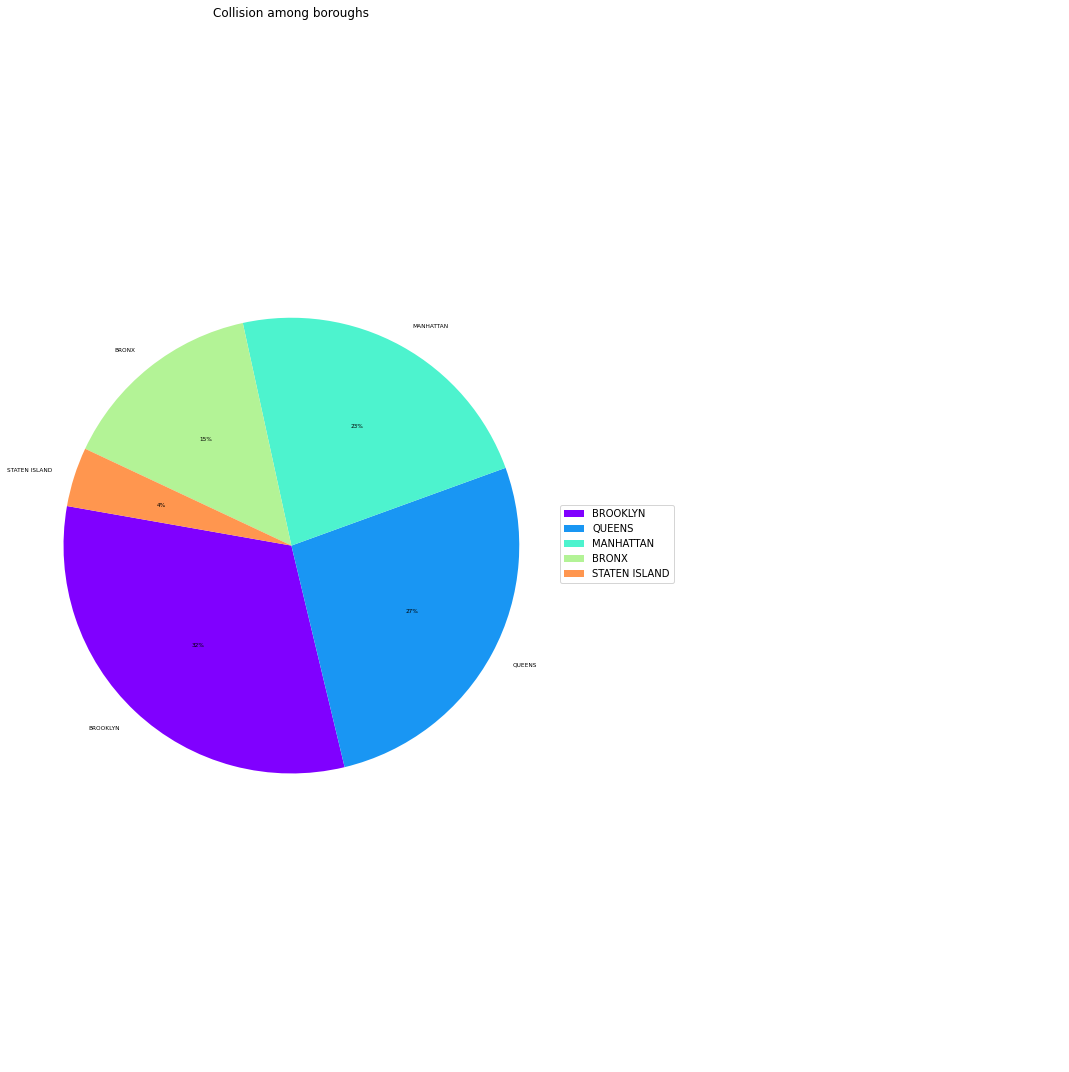

In [14]:
collisionBorough = collisionData['BOROUGH']
collisionBorough = collisionBorough.value_counts()
labels = collisionBorough.index
plotPieChart(collisionBorough,labels,"Collision among boroughs")

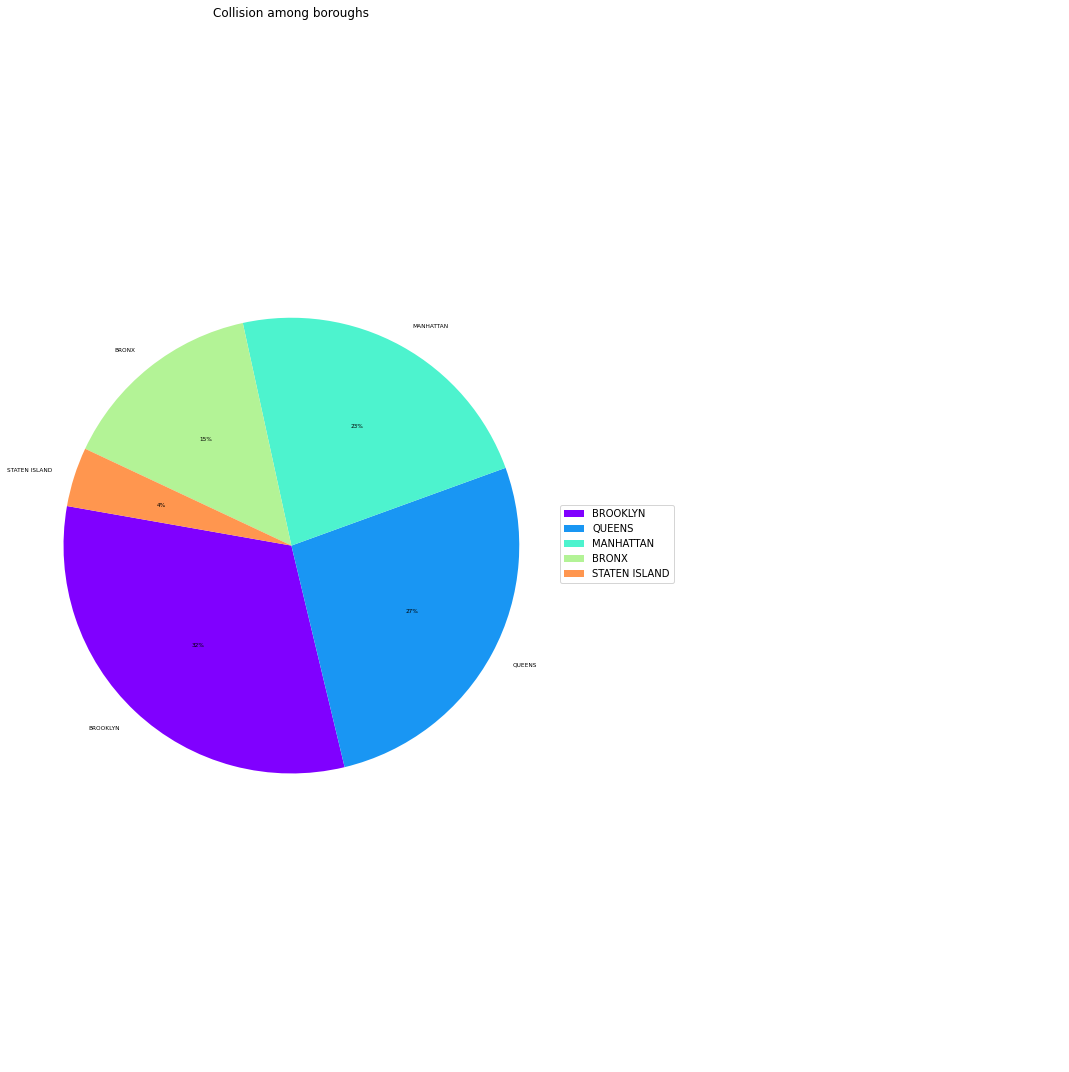

In [15]:
collisionBorough = collisionData['BOROUGH']
collisionBorough = collisionBorough.value_counts()
labels = collisionBorough.index
plotPieChart(collisionBorough,labels,"Collision among boroughs")

In [16]:
collisionVehicle = collisionData['VEHICLE TYPE CODE 1']
collisionVehicle = collisionVehicle.value_counts();
collisionVehicle.head()

Sedan                                  485499
PASSENGER VEHICLE                      416206
Station Wagon/Sport Utility Vehicle    385173
SPORT UTILITY / STATION WAGON          180291
Taxi                                    46386
Name: VEHICLE TYPE CODE 1, dtype: int64

Here we try to analyze the different car type of collision in different boroughs.

In [17]:
# this function extract exact number of collision in sedan,suv,taxi,and pick up truck in given borough.
def getBoroughDistribution(cityName,collisionData):
    borough = collisionData.loc[collisionData['BOROUGH']== cityName]
    borough = borough[borough['VEHICLE TYPE CODE 1'].notna()]
    borough['VEHICLE TYPE CODE 1'] = borough['VEHICLE TYPE CODE 1'].str.lower()
    borough.loc[borough['VEHICLE TYPE CODE 1'].str.contains('sedan'), 'VEHICLE TYPE CODE 1'] = 'sedan'
    borough.loc[borough['VEHICLE TYPE CODE 1'].str.contains('Sport'), 'VEHICLE TYPE CODE 1'] = 'SUV'
    sedanNum = len(borough.loc[borough['VEHICLE TYPE CODE 1'].str.contains('sedan')==True])
    pickUpNum = len(borough.loc[borough['VEHICLE TYPE CODE 1'].str.contains('pick')==True])
    taxiNum = len(borough.loc[borough['VEHICLE TYPE CODE 1'].str.contains('taxi')==True])
    SUVNum = len(borough.loc[borough['VEHICLE TYPE CODE 1'].str.contains('sport')==True])
    return [sedanNum,pickUpNum,taxiNum,SUVNum]

In [18]:
brooklyn = getBoroughDistribution('BROOKLYN',collisionData)
queens = getBoroughDistribution('QUEENS',collisionData)
bronx = getBoroughDistribution('BRONX',collisionData)
island = getBoroughDistribution('STATEN ISLAND',collisionData)
manhattan = getBoroughDistribution('MANHATTAN',collisionData)

In [19]:
columns = ["Sedan","Pick-up Truck", "Taxi","SUV"]
index = ['BROOKLYN','QUEENS','BRONX','STATEN ISLAND','MANHATTAN']
frames = [brooklyn,queens,bronx,island,manhattan]
frames = pd.DataFrame(frames,index = index,columns = columns)
frames

,Sedan,Pick-up Truck,Taxi,SUV
BROOKLYN,113814,7912,6875,125121
QUEENS,95752,7142,5402,115164
BRONX,57038,3600,4863,53613
STATEN ISLAND,15807,1564,80,16375
MANHATTAN,57291,7554,41442,67939


In [20]:
frames.reset_index(inplace=True)
frames = frames.rename(columns = {'index':'Borough'})
frames

,Borough,Sedan,Pick-up Truck,Taxi,SUV
0,BROOKLYN,113814,7912,6875,125121
1,QUEENS,95752,7142,5402,115164
2,BRONX,57038,3600,4863,53613
3,STATEN ISLAND,15807,1564,80,16375
4,MANHATTAN,57291,7554,41442,67939


<AxesSubplot:xlabel='Borough'>

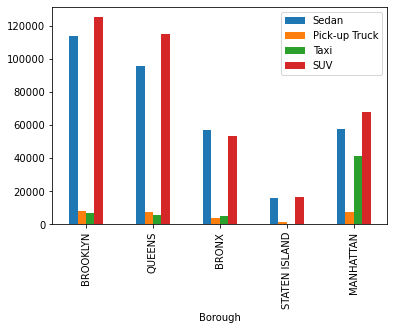

In [21]:
frames.plot(x='Borough',y=["Sedan","Pick-up Truck","Taxi","SUV"],kind ='bar')

In [22]:
airbnbData.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [23]:
avgData = airbnbData.groupby('neighbourhood_group')['price'].mean()
labels = avgData.index
labels

Index(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'], dtype='object', name='neighbourhood_group')

And let's plot out the average price of airbnb rent price in each borough.

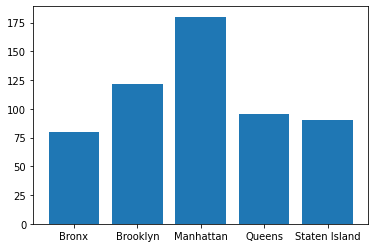

In [24]:
plt.bar(labels, avgData)
plt.show()

# Explore New York neighborhood data
Download and open json file from https://cocl.us/new_york_dataset

In [36]:
with open('data/nyu_2451_34572-geojson.json') as json_data:
    newyork_data = json.load(json_data)
newyork_data['features'][:5]

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [26]:
neighborhoods_data = newyork_data['features']
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

Load json data into Pandas DataFrame

In [27]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough.upper(),
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
neighborhoods

,Borough,Neighborhood,Latitude,Longitude
0,BRONX,Wakefield,40.894705,-73.847201
1,BRONX,Co-op City,40.874294,-73.829939
2,BRONX,Eastchester,40.887556,-73.827806
3,BRONX,Fieldston,40.895437,-73.905643
4,BRONX,Riverdale,40.890834,-73.912585
...,...,...,...,...
301,MANHATTAN,Hudson Yards,40.756658,-74.000111
302,QUEENS,Hammels,40.587338,-73.805530
303,QUEENS,Bayswater,40.611322,-73.765968
304,QUEENS,Queensbridge,40.756091,-73.945631


Define a function that calculate the distance between vehicle collision and neighborhoods

In [28]:
def vehicle_collision_neighborhood(location: tuple, borough: str) ->str:
    bor = neighborhoods.loc[neighborhoods.Borough == borough, ['Borough', 'Neighborhood', 'Latitude', 'Longitude']]
    bor['Coords'] = bor[['Latitude', 'Longitude']].apply(tuple, axis=1)
    for index, row in bor.iterrows():
        bor.loc[index, 'Distance'] = geodesic(location, bor.loc[index, 'Coords']).km
    min_index = bor['Distance'].idxmin()
    return bor.loc[min_index, 'Neighborhood']

In [29]:
vehicle_collision_neighborhood((40.895437, -73.905643), 'BRONX')

'Fieldston'